In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import art3d
from matplotlib import cm
import pandas as pd
import os
import json
import subprocess
import cv2
import glob
%matplotlib inline

In [2]:
import opmap
from opmap.VideoData import VideoData
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie
from opmap.cmap import bipolar

import inspect

In [3]:
inspect.getsourcelines(PhaseMap)

(['class PhaseMap( VideoData ):\n',
  '\n',
  "    def __init__(self, vmem, shrink = 4, kind = 'None', fs = 1000.0, fe = [2.0, 20.0], mindist = 30 ):\n",
  '\n',
  '        self.shrink = shrink\n',
  '        size_org = vmem.data.shape\n',
  '\n',
  '        super(PhaseMap, self).__init__(size_org[0],size_org[1]/shrink, size_org[2]/shrink)\n',
  '\n',
  "        if kind is 'pseudoEMD':\n",
  '\n',
  '            def f_pixelwise_analytic(src):\n',
  '                data = src\n',
  '                data_max = np.zeros_like(data)\n',
  '                data_min = np.zeros_like(data)\n',
  '\n',
  '                # max \n',
  '                peakind = np.array(signal.find_peaks_cwt(data, np.arange(1,mindist)))\n',
  '\n',
  '                if len(peakind) > 4:\n',
  '                    f_start, f_end = peakind.min(), peakind.max()\n',
  '                    data_max[:f_start] = data[f_start]\n',
  '                    data_max[f_end:] = data[f_end]\n',
  "                    data_max

In [4]:
size_H = 300
size_W = 300

sim_dir_root =    '/mnt/recordings/SimulationResults/'
save_dir_root = '/mnt/recordings/AnalysisResult/Tomii/2017-09-01/'


In [5]:
data_dir = os.path.join( sim_dir_root, os.path.join( sim_dir_root,  '20170809-4' ) )
save_dir = data_dir.replace( sim_dir_root, save_dir_root )
print save_dir    

if not os.path.exists(save_dir): os.makedirs(save_dir)

/mnt/recordings/AnalysisResult/Tomii/2017-09-01/20170809-4


In [6]:
vmem_files = glob.glob(data_dir+ '/vmem*.npy')
length = len( vmem_files )

vm_array = np.zeros((length, size_H,size_W)) 
for j, f in enumerate(sorted(vmem_files)):
    vm_array[j, :, :] = np.load( f )

vmem = VideoData(length, size_H, size_W)
vmem.data = np.copy(vm_array)
vmem.cmap = bipolar(neutral=0, lutsize=1024)
vmem.vmin = np.min(vmem.data)
vmem.vmax = np.max(vmem.data)


In [7]:
#pmap = PhaseMap(vmem, shrink=4, kind='pseudoEMD', mindist=40)
pmap = PhaseMap(vmem, shrink=1)

In [8]:
pvmap = PhaseVarianceMap(pmap, size=3)

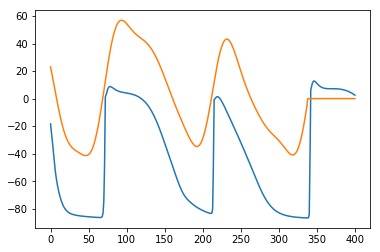

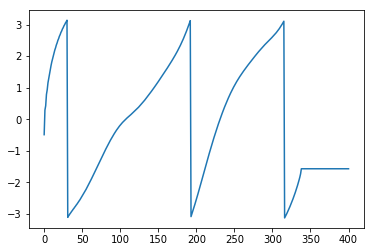

In [12]:
plt.plot(vmem.data[:,120,180])
plt.plot(pmap.analytic[:,120,180])
plt.show()
plt.plot(pmap.data[:,120,180])

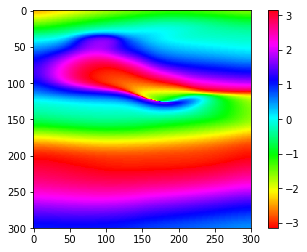

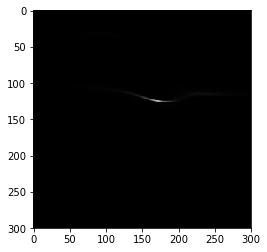

In [15]:
pmap.cmap = 'hsv'
pmap.showFrame(215)
plt.colorbar()
plt.show()
pvmap.showFrame(215)

In [93]:
pnts = [
    [121,180],
    [123,180],
    [125,180],
    [127,180],
    [129,180],
]

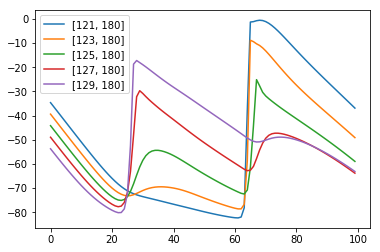

In [94]:
for pnt in pnts: plt.plot(vmem.data[150:250,pnt[0],pnt[1]], label = '{0}'.format(str(pnt)))
plt.legend()

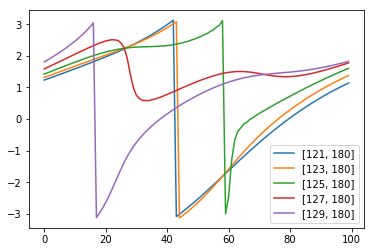

In [95]:
for pnt in pnts: plt.plot(pmap.data[150:250,pnt[0],pnt[1]], label = '{0}'.format(str(pnt)))
plt.legend()    

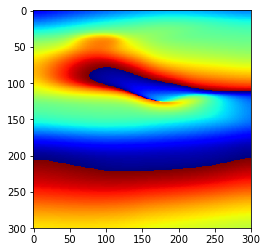

In [67]:
pmap.showFrame(215)

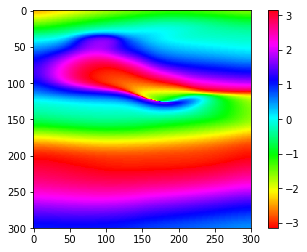

In [172]:
pmap.cmap = 'hsv'
pmap.showFrame(215)
plt.colorbar()

In [107]:
from scipy import signal
from scipy.interpolate import interp1d

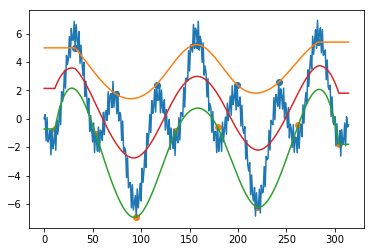

In [171]:
xs = np.arange(0, 5*np.pi, 0.05)

data = 3*np.sin(xs) + 3*np.sin(3*xs + np.pi) + np.sin(50*xs)

data_max = np.zeros_like(data)
data_min = np.zeros_like(data)

# max 
peakind = np.array(signal.find_peaks_cwt(data, np.arange(1,10)))
plt.scatter(peakind, data[peakind])

f_start, f_end = peakind.min(), peakind.max()
data_max[:f_start] = data[f_start]
data_max[f_end:] = data[f_end]
data_max[f_start:f_end:1] = interp1d(peakind, data[peakind], kind='cubic')(np.arange(f_start, f_end ))

# min
peakind = np.array(signal.find_peaks_cwt(-data, np.arange(1,10)))
plt.scatter(peakind, data[peakind])

f_start, f_end = peakind.min(), peakind.max()
data_min[:f_start] = data[f_start]
data_min[f_end:] = data[f_end]
data_min[f_start:f_end:1] = interp1d(peakind, data[peakind], kind='cubic')(np.arange(f_start, f_end ))

# mean
data_mean = (data_max+data_min)/2.

# plot
plt.plot(data)
plt.plot(data_max)
plt.plot(data_min)
plt.plot(data_mean)


In [175]:
 b = np.array(
     [
         [[1,2,3], [4,5,6], [7,8,9]],
         [[1,2,3], [4,5,6], [7,8,9]],
         [[1,2,3], [4,5,6], [7,8,9]],
         [[1,2,3], [4,5,6], [7,8,9]]
     ]
 )

In [176]:
b.shape

(4, 3, 3)

In [177]:
def my_func(a):
    return (a[0] + a[-1]) * 0.5

np.apply_along_axis(my_func, 0, b)

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])